<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/01_Supervised-%20Machine%20Learning/05_SVM/Hand_written_digit%20classification(Mnist%20Dataset)/hand_written_digit_classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

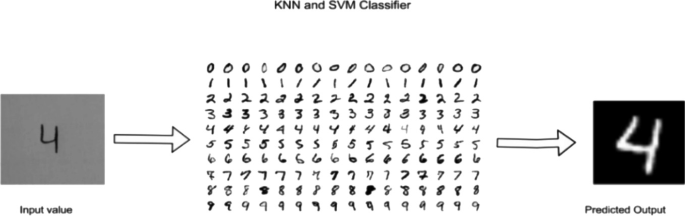
#**Hand-Written Digit Classification using SVC**
**📘Project Summary:**

This project focuses on building a highly accurate machine learning model to automatically recognize and classify hand-written digits (0-9) from image data. This is a fundamental problem in computer vision and the basis for Optical Character Recognition (OCR) systems.

**Project Aim:**
The primary aim was to develop a robust classification model capable of distinguishing between the ten unique digits

**Loading dataset and data arrangement**

In [85]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np

digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [86]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df["target"] = digits.target

# mapping target values to target names
target_mapping = {i: name for i, name in enumerate(digits.target_names)}
df["target_names"] = df["target"].map(target_mapping)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target,target_names
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,4


**Creating input variable and target variable**

In [87]:
x = df.drop(columns=["target","target_names"])
y = df["target"]

**Visualising Data**

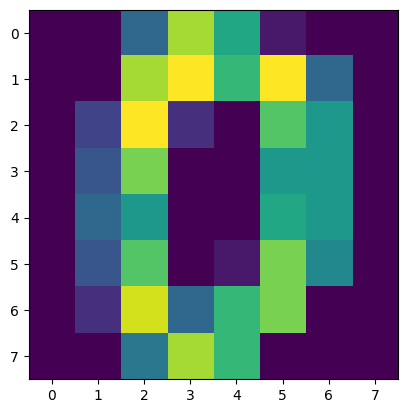

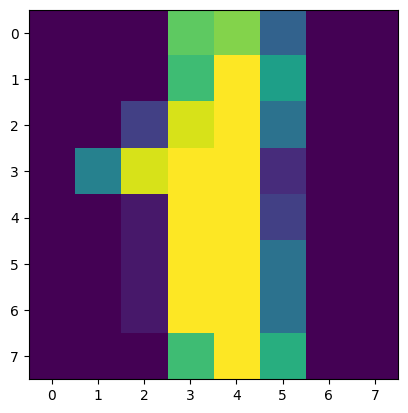

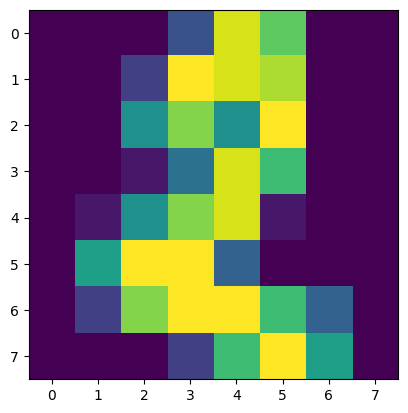

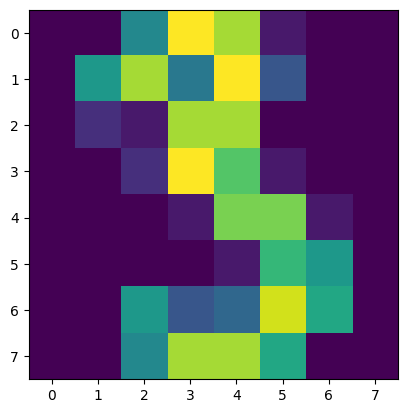

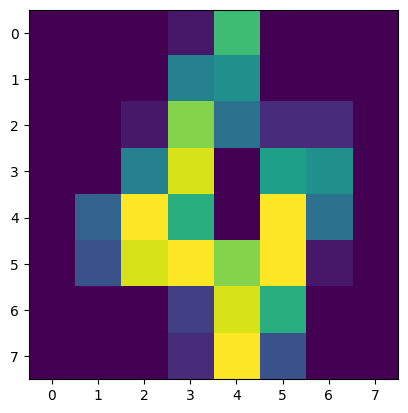

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(5):
    plt.imshow(x.iloc[i].values.reshape(8,8))
    plt.show()

**Model Preparation: Spliting into train/test sets to evaluate performance.**

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=37)
print(f"x_train_shape: {x_train.shape}")
print(f"x_test_shape: {x_test.shape}")

x_train_shape: (1437, 64)
x_test_shape: (360, 64)


**Model Building: training SVC Model classification.**

In [90]:
from sklearn.svm import SVC
model = SVC( max_iter=10000, C=30, kernel="rbf").fit(x_train, y_train)
print(f"x_train_score: {model.score(x_train, y_train)}")
print(f"x_test_score: {model.score(x_test, y_test)}")

x_train_score: 1.0
x_test_score: 0.9972222222222222


In [91]:
y_pred = model.predict(x_test)

**Testing Prediction to see accuracy**

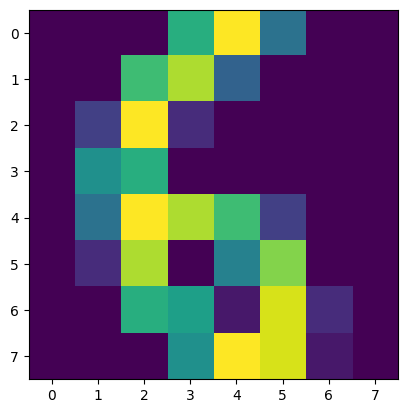

In [92]:
plt.imshow(x_test.iloc[57].values.reshape(8,8))

In [93]:
y_pred[57]

np.int64(6)

#**Classification report:** Accuracy / F1-Score | 99% | High confidence in classifying hand written digits.

In [94]:
from sklearn.metrics import confusion_matrix, classification_report

CR = classification_report(y_test, y_pred)
print(CR)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        32
           5       1.00      0.97      0.99        38
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        34
           8       1.00      1.00      1.00        42
           9       0.97      1.00      0.99        38

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



**Confusion Matrix**

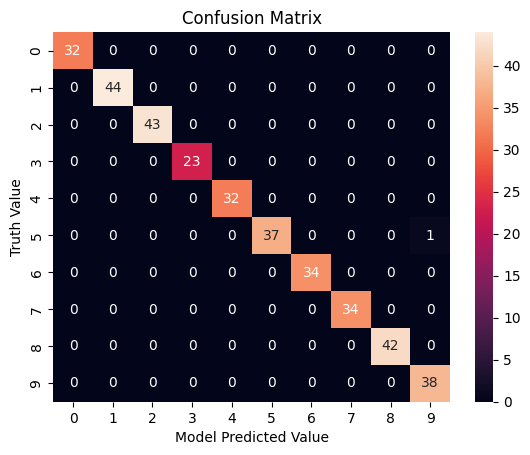

In [95]:
import seaborn as sns

C_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(C_matrix, annot=True)
plt.xlabel("Model Predicted Value")
plt.ylabel("Truth Value")
plt.title("Confusion Matrix")
plt.show()

**Conclusion:**

 Model Deployability and Value Proposition
When deployed, this \mathbf{99\%} accurate SVC model forms the core of a highly reliable digit recognition engine.
The model can be integrated into various real-world applications, including:
 * OCR Systems: Automatically reading and digitizing forms, checks, invoices, or other documents containing hand-written numeric entries, significantly reducing manual data entry errors.
  * Automation: Implementing in mail sorting facilities or logistics to automatically process zip codes and package tracking information.
   * Security/Verification: Assisting in the verification of numeric input where the input is captured as an image.